In [1]:
# Predicting Depression Status Among Students Using Decision Tree Classifier

In [2]:
## Introduction
# This project aims to predict the depression status of students based on various demographic, academic, and lifestyle features using machine learning classification algorithms. We will implement and compare four classification models: Logistic Regression, Support Vector Machine (SVM), Decision Tree, and Naive Bayes.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [4]:
# Load the dataset
file_path = 'Student Depression Dataset.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Drop unnecessary columns
columns_to_remove = ['id', 'City', 'Profession', 'Work Pressure', 'Job Satisfaction']
cleaned_data = data.drop(columns=columns_to_remove)

# Handle missing values
# Drop rows with missing target values
cleaned_data = cleaned_data.dropna(subset=['Depression'])

# Optionally: Drop rows with any missing values
cleaned_data = cleaned_data.dropna()

# Encode categorical variables (one-hot encoding)
categorical_columns = ['Gender', 'Sleep Duration', 'Dietary Habits', 
                       'Degree', 'Family History of Mental Illness', 
                       'Have you ever had suicidal thoughts ?']
cleaned_data = pd.get_dummies(cleaned_data, columns=categorical_columns, drop_first=True)

# Save the cleaned data to a new CSV (optional)
cleaned_data.to_csv('cleaned_data.csv', index=False)


FileNotFoundError: [Errno 2] No such file or directory: 'Student Depression Dataset.csv'

In [16]:
# Load the cleaned dataset
cleaned_data = pd.read_csv('cleaned_data.csv')

# Display first few rows
cleaned_data.head()


,Age,Academic Pressure,CGPA,Study Satisfaction,Work/Study Hours,Financial Stress,Depression,Gender_Male,Sleep Duration_7-8 hours,Sleep Duration_Less than 5 hours,...,Degree_MBBS,Degree_MCA,Degree_MD,Degree_ME,Degree_MHM,Degree_MSc,Degree_Others,Degree_PhD,Family History of Mental Illness_Yes,Have you ever had suicidal thoughts ?_Yes
0,33.0,5.0,8.97,2.0,3.0,1.0,1,True,False,False,...,False,False,False,False,False,False,False,False,False,True
1,24.0,2.0,5.90,5.0,3.0,2.0,0,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,31.0,3.0,7.03,5.0,9.0,1.0,0,True,False,True,...,False,False,False,False,False,False,False,False,True,False
3,28.0,3.0,5.59,2.0,4.0,5.0,1,False,True,False,...,False,False,False,False,False,False,False,False,True,True
4,25.0,4.0,8.13,3.0,1.0,1.0,0,False,False,False,...,False,False,False,False,False,False,False,False,False,True


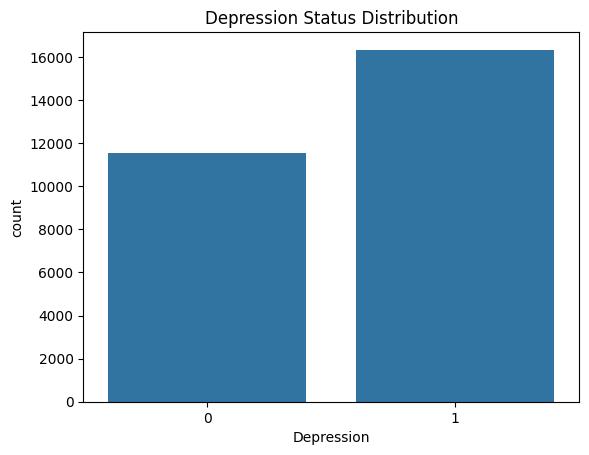

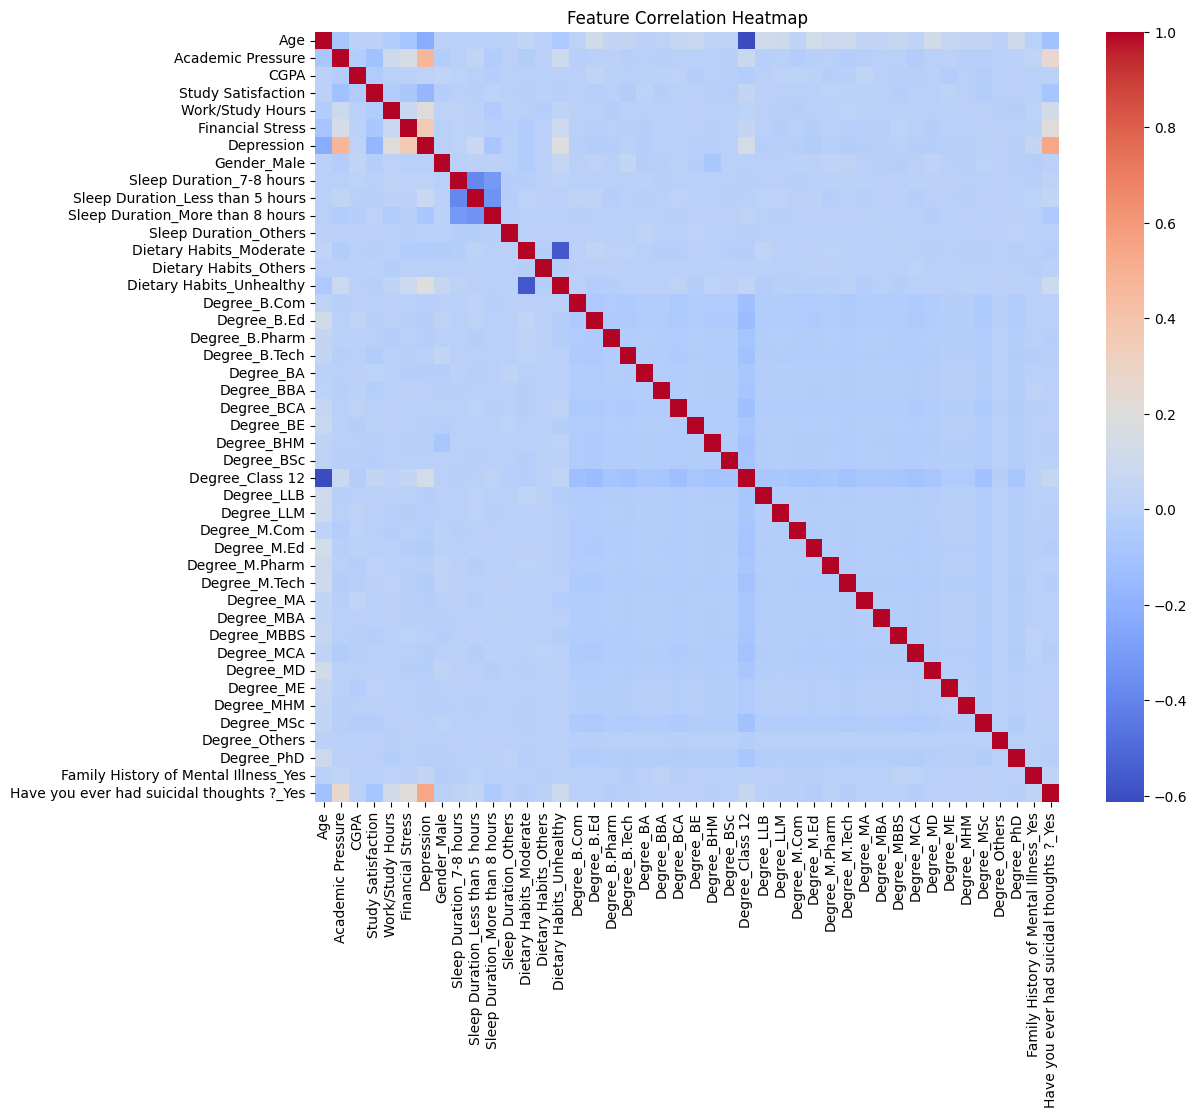

In [17]:
# Check for class distribution
sns.countplot(x='Depression', data=cleaned_data)
plt.title('Depression Status Distribution')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(cleaned_data.corr(), annot=False, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


In [18]:
# Confirm no missing values
cleaned_data.isnull().sum()


Age                                          0
Academic Pressure                            0
CGPA                                         0
Study Satisfaction                           0
Work/Study Hours                             0
Financial Stress                             0
Depression                                   0
Gender_Male                                  0
Sleep Duration_7-8 hours                     0
Sleep Duration_Less than 5 hours             0
Sleep Duration_More than 8 hours             0
Sleep Duration_Others                        0
Dietary Habits_Moderate                      0
Dietary Habits_Others                        0
Dietary Habits_Unhealthy                     0
Degree_B.Com                                 0
Degree_B.Ed                                  0
Degree_B.Pharm                               0
Degree_B.Tech                                0
Degree_BA                                    0
Degree_BBA                                   0
Degree_BCA   

In [19]:
# Define features and target
X = cleaned_data.drop('Depression', axis=1)
y = cleaned_data['Depression']


In [20]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42, 
                                                    stratify=y)

print(f"Training Features: {X_train.shape}")
print(f"Testing Features: {X_test.shape}")
print(f"Training Labels: {y_train.shape}")
print(f"Testing Labels: {y_test.shape}")


Training Features: (22318, 43)
Testing Features: (5580, 43)
Training Labels: (22318,)
Testing Labels: (5580,)


In [21]:
# Initialize the Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the model
decision_tree.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [22]:
# Predictions on training and testing data
y_pred_train = decision_tree.predict(X_train)
y_pred_test = decision_tree.predict(X_test)


Training Accuracy: 1.0
Testing Accuracy: 0.7724014336917563


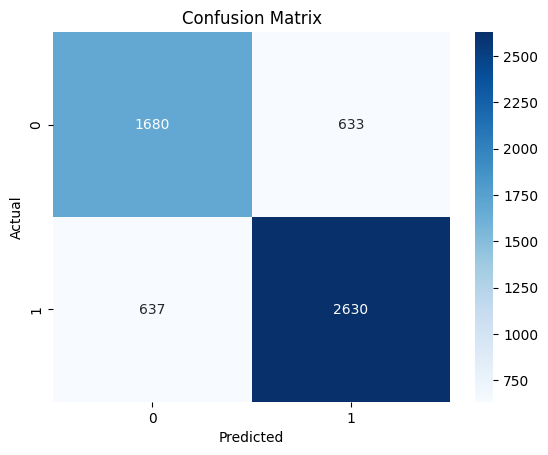

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.73      0.73      2313
           1       0.81      0.81      0.81      3267

    accuracy                           0.77      5580
   macro avg       0.77      0.77      0.77      5580
weighted avg       0.77      0.77      0.77      5580



In [23]:
# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
classification_rep = classification_report(y_test, y_pred_test)
print("Classification Report:\n", classification_rep)


In [27]:
# Naive Bayes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train, y_train)

# Make predictions
y_pred = nb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display evaluation results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("\nClassification Report:\n")
print(classification_rep)

Accuracy: 0.766547192353644
Precision: 0.8083228247162674
Recall: 0.7868248772504092
F1 Score: 0.7974289861082314

Classification Report:

              precision    recall  f1-score   support

           0       0.71      0.74      0.72      3482
           1       0.81      0.79      0.80      4888

    accuracy                           0.77      8370
   macro avg       0.76      0.76      0.76      8370
weighted avg       0.77      0.77      0.77      8370



In [ ]:
## Conclusion
# The Decision Tree classifier achieved a testing accuracy of 77.24%.
# The Naive Bayes classifier achieved a testing accuracy of 75.86%.